# Visualização de dados

Uma visualização gráfica dos dados auxilia na identificação de possíveis padrões e na tomada de decisões dos pré-processamentos a serem realizados nos dados. Nem sempre é necessário criar gráficos para todo o *dataset*, bastante gráficos suficientes para se ter uma ideia do formato geral dos dados.

Antes de plotar os gráficos é preciso conhecer seus dados. Estaremos utilizando neste `notebook` um *dataset* com dados EMG coletados de dez sujeitos, porém iremos plotar em gráficos apenas os dados de um único sujeito. Neste *dataset* foram coletados 10 movimentos diferentes com dois canais de EMG. Iremos plotar um gráfico para cada canal, apra cada movimento.

Utilizaremos a biblioteca [matplotlib](https://matplotlib.org) para gerar os gráficos.

In [2]:
# Carregando dados
import numpy as np

data = np.load('./lib/data/converted/s1.npy')
print(f'{data.shape} - (classes, ensaios, canais, linhas)')

(10, 6, 2, 20000) - (classes, ensaios, canais, linhas)


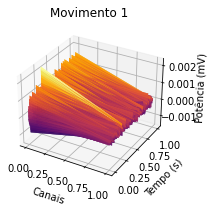

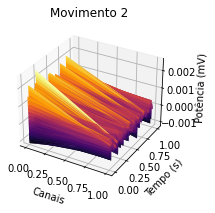

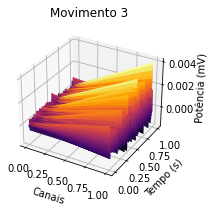

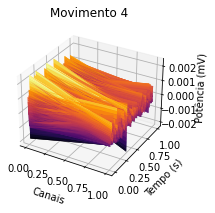

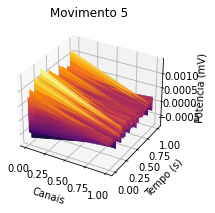

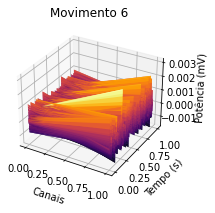

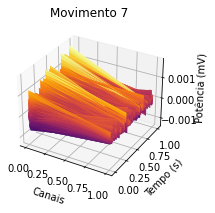

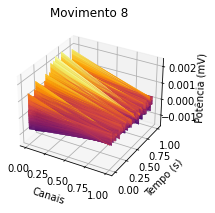

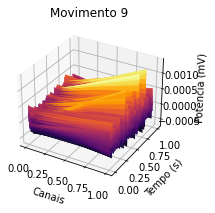

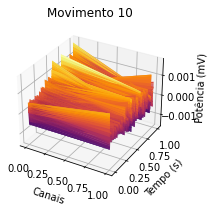

In [33]:
%matplotlib inline

import numpy as np 
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib import rcParams

rcParams['figure.figsize'] = [9., 3.]

for mov in range(10):
    plot_data = []
    for channel in range(2):
        # espaço de 4000 pontos entre 0 e 1
        for i, t in enumerate(np.linspace(0, 1, 4000)):
            plot_data.append([channel, t, data[mov][0][channel][i]])
    plot_data = np.array(plot_data)
    x, y, z = plot_data[:,0], plot_data[:,1], plot_data[:,2]
    ax = plt.axes(projection ='3d')
    ax.set_title('Movimento {}'.format(mov + 1))
    ax.set_xlabel('Canais')
    ax.set_ylabel('Tempo (s)')
    ax.set_zlabel('Potência (mV)')
    ax.plot_trisurf(x, y, z, antialiased=True, cmap=cm.inferno, linewidth=1)
    plt.show()

O trecho de código acima, está imprimindo o gráfico dos 10 movimentos apresentados. Porém, é mostrado somente o 1º segundo (primeiros 4.000 pontos equivalentes a 1 segundo) do 1º ensaio.

Isto ocorre, pois se apresentarmos os 5 segundos de experimento, o gráfico terá um peso visual muito maior (20.000 pontos * 2 canais = 40.000 pontos) e demorará muito para mostrar o gráfico dos 10 movimentos.

Como a visualização serve aqui como título de comparação entre os movimentos, não há a necessidade de mostrar todos os pontos. Assim, se faz necessário a apresentação de uma amostra desses pontos.

Todavia, o trecho acima mostra o 1º segundo de cada movimento, o que pode ser ruim, se o movimento possui maior diferenciação um do outro ao longo dos 5 segundos.

Para resolver esse impasse, sugere-se que seja obtido uma amostra dos pontos ao longo dos 5 segundos. Para isso, pode ser utilizanda uma técnica chamada de `resample` (do inglês, reamostragem) do sinal:

(10, 6, 2, 5000)


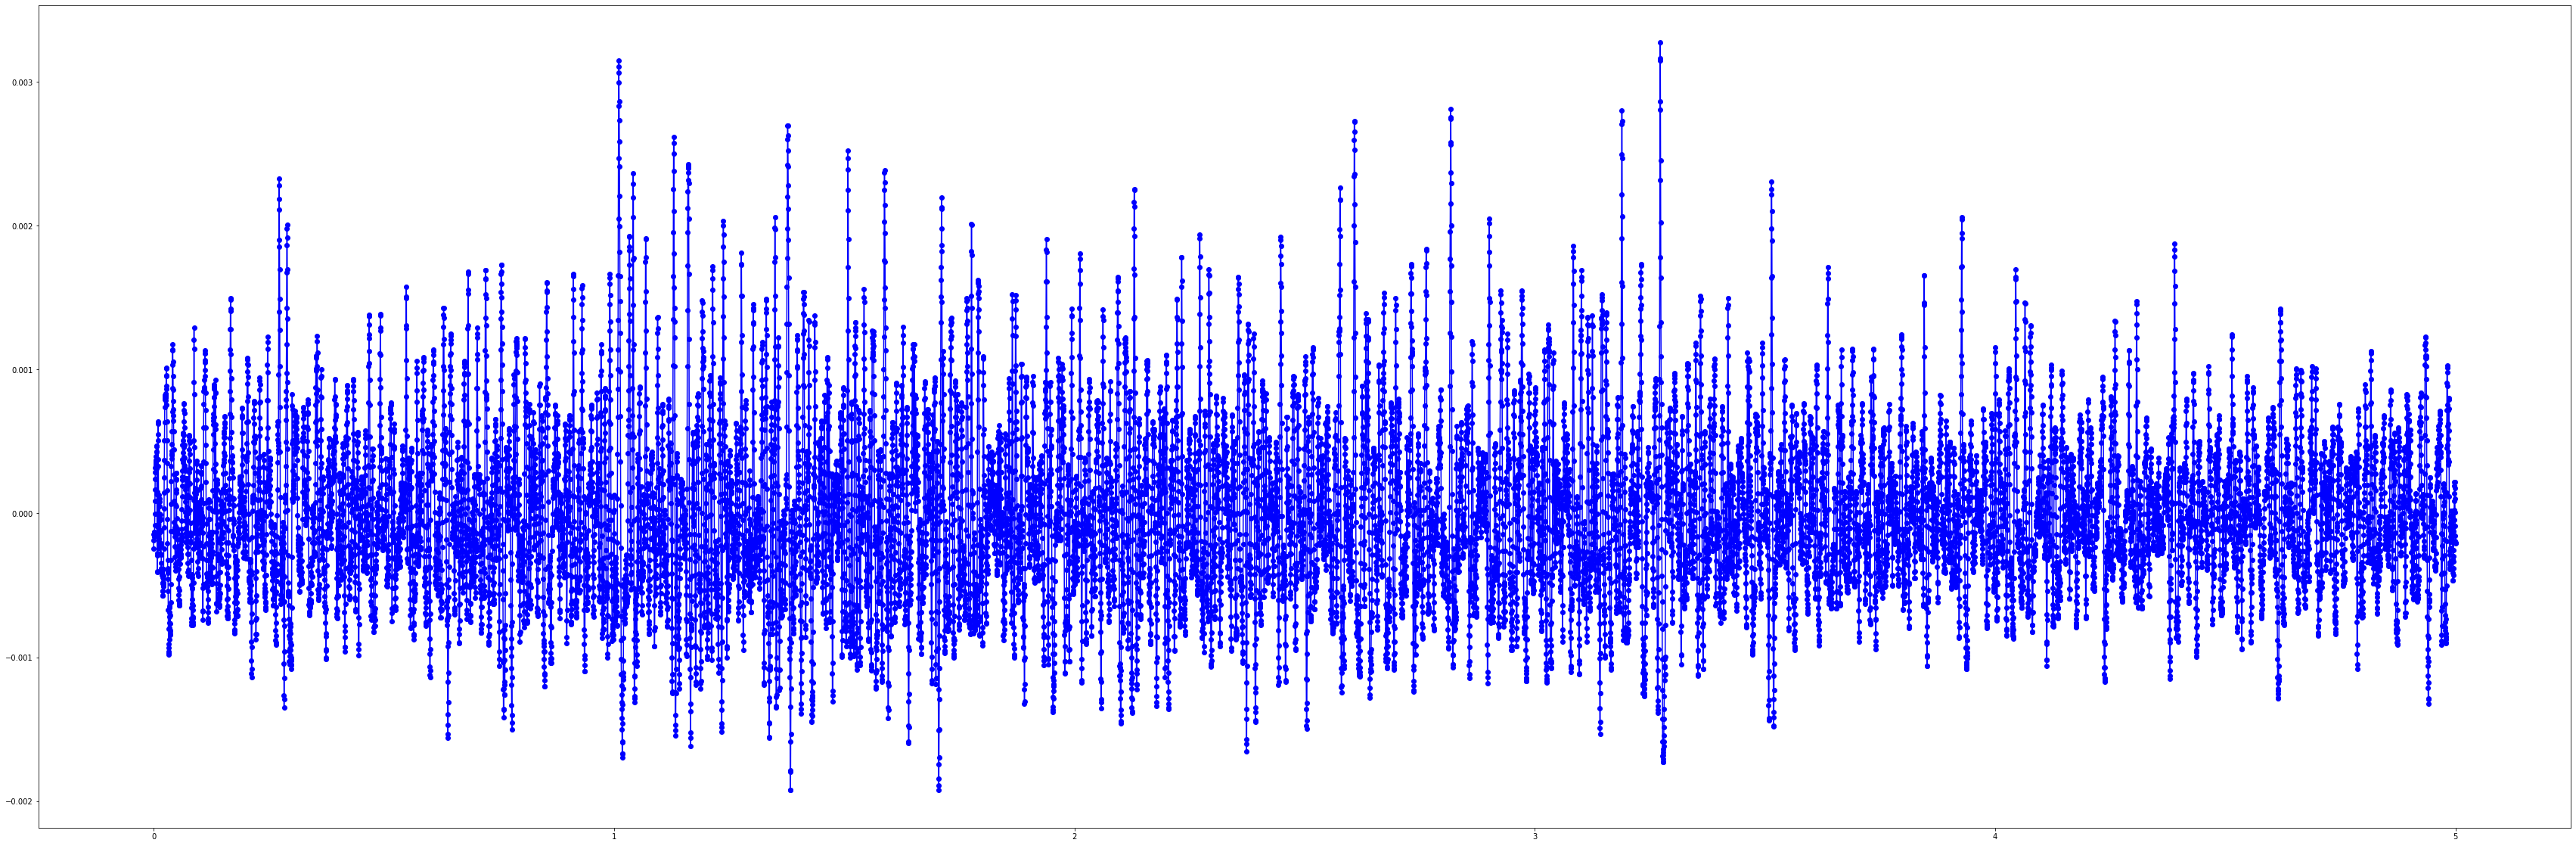

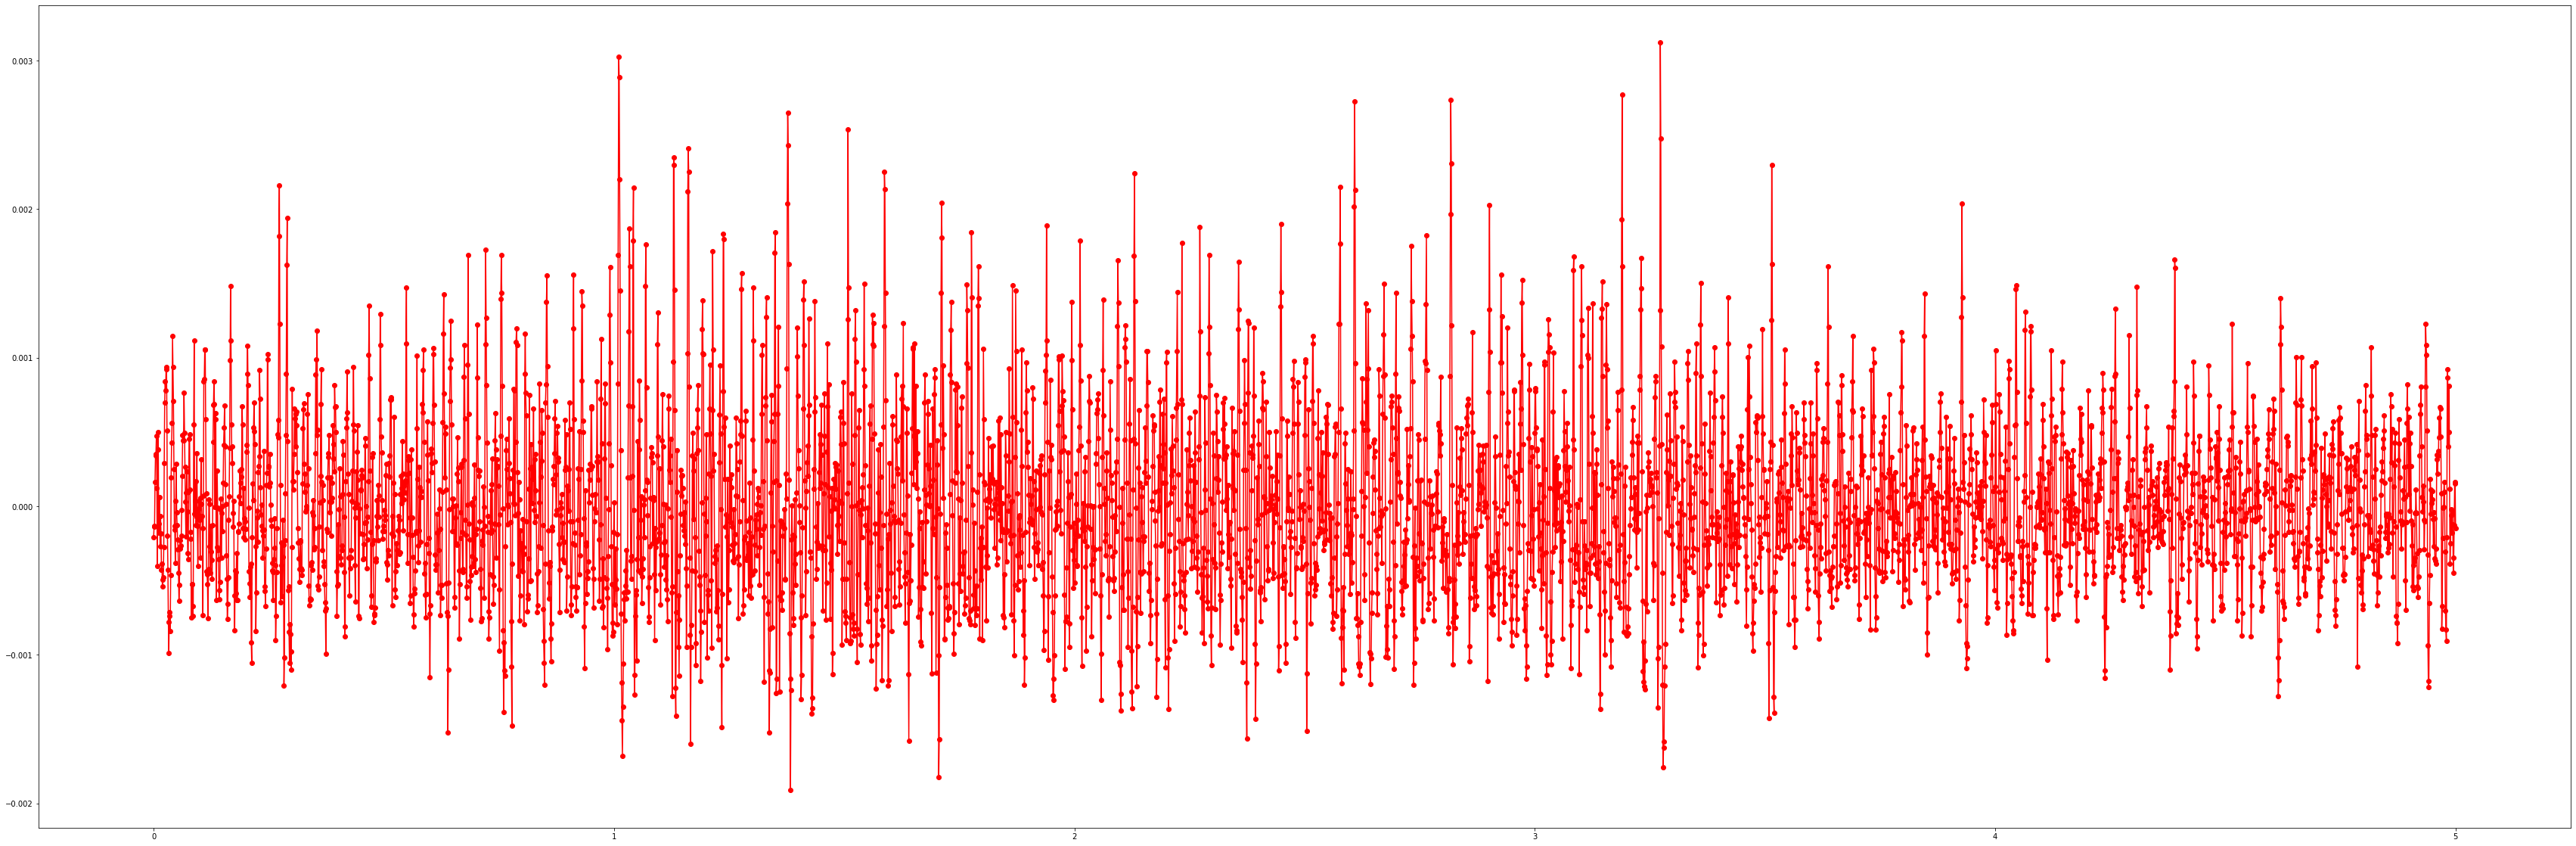

In [38]:
from scipy import signal

# ordem do downsample
do = 4
npts = 20000
rnpts = int(npts / do)

# resample
rdata = signal.resample(data, rnpts, axis=-1)
print(rdata.shape)

rcParams['figure.figsize'] = [60., 20.]

y = data[0,0,0,:]
x = np.linspace(0, 5, npts)
yre = rdata[0,0,0,:]
xre = np.linspace(0, 5, int(rnpts))
plt.plot(x, y, 'ob-')
plt.show()
plt.plot(xre, yre, 'or-')
plt.show()

**Desafio:** refazer a comparação dos gráficos dos movimento (verificar a diferença) e tentar comparar tentativas (lado a lado, para ver se são iguais)

Mostrando o gráfico do espectrograma...

Text(0.5, 0, 'Time [sec]')

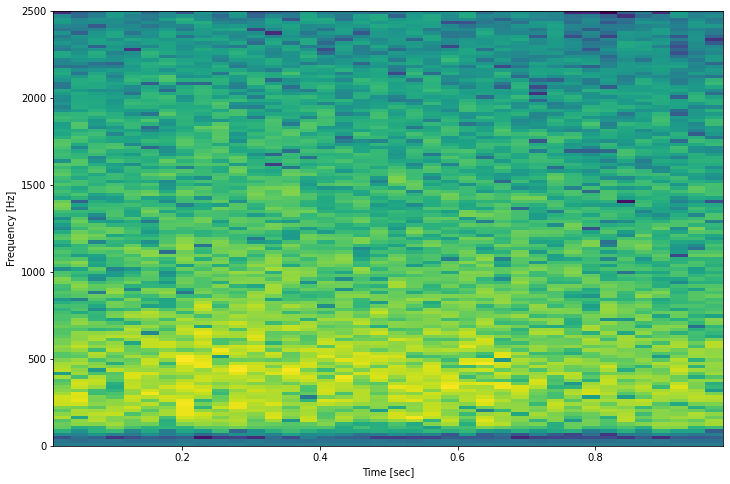

In [46]:
rcParams['figure.figsize'] = [12., 8.]

plt.specgram(yre, Fs=rnpts)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')

**Desafio:** fazer o mesmo solicitado acima, mas mostrando agora os espectrogramas...